In [1]:
import requests
import re
from bs4 import BeautifulSoup as bs
import pandas as pd
import datetime as dt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
df_ready = pd.read_csv('drive/My Drive/df_ready_2023.csv')
pd.set_option('display.max_columns', None)
df_ready.head(25)

,Unnamed: 0,GameId,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomexG,AwayxG,GW,HTGS,ATGS,HTGC,ATGC,HTxGS,ATxGS,HTxGC,ATxGC,winner,glicko_diff,target,HTP,ATP,Date,HomeShots,AwayShots,HomeShotOT,AwayShotsOT,HomeCorners,AwayCorners,OddsH,OddsD,OddsA,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HomeStrength,AwayStrength,HomexGStrength,AwayxGStrength,HomeGoals_ema,AwayGoals_ema,HomexG_ema,AwayxG_ema,HomeShots_ema,AwayShots_ema,HomeShotsOT_ema,AwayShotsOT_ema,HomeCorners_ema,AwayCorners_ema,HomeGoals_5ma,AwayGoals_5ma,HomexG_5ma,AwayxG_5ma,HomeShots_5ma,AwayShots_5ma,HomeShotsOT_5ma,AwayShotsOT_5ma,HomeCorners_5ma,AwayCorners_5ma
0,0,1,Burnley,Manchester City,0.000000,3.000000,0.311032,2.400740,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,L,0,0,11/08/2023,6.000000,17.000000,1.000000,8.000000,6.000000,5.000000,0.125000,0.181818,0.751880,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Arsenal,Nottingham Forest,2.000000,1.000000,0.842620,0.966305,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,W,0,0,12/08/2023,15.000000,6.000000,7.000000,2.000000,8.000000,3.000000,0.847458,0.142857,0.066667,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Bournemouth,West Ham,1.000000,1.000000,1.510250,1.483400,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,D,0,0,12/08/2023,14.000000,16.000000,5.000000,3.000000,10.000000,4.000000,0.370370,0.294118,0.392157,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,Brighton,Luton,4.000000,1.000000,4.367480,1.885940,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,W,0,0,12/08/2023,27.000000,9.000000,12.000000,3.000000,6.000000,7.000000,0.751880,0.181818,0.111111,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Everton,Fulham,0.000000,1.000000,2.590010,1.581440,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,L,0,0,12/08/2023,19.000000,9.000000,9.000000,2.000000,10.000000,4.000000,0.454545,0.294118,0.303030,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,6,Sheffield United,Crystal Palace,0.000000,1.000000,0.422704,2.276160,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,L,0,0,12/08/2023,8.000000,24.000000,1.000000,8.000000,5.000000,5.000000,0.333333,0.303030,0.420168,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,7,Newcastle United,Aston Villa,5.000000,1.000000,4.322080,1.486000,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,W,0,0,12/08/2023,17.000000,16.000000,13.000000,6.000000,6.000000,5.000000,0.571429,0.266667,0.217391,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,8,Brentford,Tottenham,2.000000,2.000000,1.907560,1.453160,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,D,0,0,13/08/2023,11.000000,18.000000,6.000000,6.000000,3.000000,6.000000,0.363636,0.294118,0.408163,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,9,Chelsea,Liverpool,1.000000,1.000000,1.932580,1.299940,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,D,0,0,13/08/2023,10.000000,13.000000,4.000000,1.000000,4.000000,4.000000,0.344828,0.294118,0.420168,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,10,Manchester United,Wolverhampton Wanderers,1.000000,0.000000,1.970870,1.722280,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,W,0,0,14/08/2023,15.000000,23.000000,3.000000,6.0000

In [ ]:
#df_ready.replace([np.inf, -np.inf], 1, inplace=True)
#df_ready = df_ready.dropna(inplace=False)
#breyta í fyrsta non nan gildi

In [4]:
df_ready.head(100)

,Unnamed: 0,GameId,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomexG,AwayxG,GW,HTGS,ATGS,HTGC,ATGC,HTxGS,ATxGS,HTxGC,ATxGC,winner,glicko_diff,target,HTP,ATP,Date,HomeShots,AwayShots,HomeShotOT,AwayShotsOT,HomeCorners,AwayCorners,OddsH,OddsD,OddsA,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HomeStrength,AwayStrength,HomexGStrength,AwayxGStrength,HomeGoals_ema,AwayGoals_ema,HomexG_ema,AwayxG_ema,HomeShots_ema,AwayShots_ema,HomeShotsOT_ema,AwayShotsOT_ema,HomeCorners_ema,AwayCorners_ema,HomeGoals_5ma,AwayGoals_5ma,HomexG_5ma,AwayxG_5ma,HomeShots_5ma,AwayShots_5ma,HomeShotsOT_5ma,AwayShotsOT_5ma,HomeCorners_5ma,AwayCorners_5ma
0,0,1,Burnley,Manchester City,0.0,3.0,0.311032,2.400740,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,L,0,0,11/08/2023,6.0,17.0,1.0,8.0,6.0,5.0,0.125000,0.181818,0.751880,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,Arsenal,Nottingham Forest,2.0,1.0,0.842620,0.966305,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,W,0,0,12/08/2023,15.0,6.0,7.0,2.0,8.0,3.0,0.847458,0.142857,0.066667,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,Bournemouth,West Ham,1.0,1.0,1.510250,1.483400,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,D,0,0,12/08/2023,14.0,16.0,5.0,3.0,10.0,4.0,0.370370,0.294118,0.392157,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,Brighton,Luton,4.0,1.0,4.367480,1.885940,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,W,0,0,12/08/2023,27.0,9.0,12.0,3.0,6.0,7.0,0.751880,0.181818,0.111111,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,Everton,Fulham,0.0,1.0,2.590010,1.581440,1,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,L,0,0,12/08/2023,19.0,9.0,9.0,2.0,10.0,4.0,0.454545,0.294118,0.303030,-----,-----,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,West Ham,Everton,0.0,1.0,0.618578,0.733813,10,16.0,9.000000,16.0,14.000000,14.596629,17.658607,20.041307,14.956317,3,962.463225,L,14,7,29/10/2023,12.0,10.0,2.0,4.0,4.0,3.0,0.465116,0.285714,0.303030,LDWLL,LWLWL,4,6,1.000000,0.642857,0.728327,1.180679,1.066112,1.741881,1.963628,1.591814,15.519357,11.614645,4.896223,4.267850,5.292414,4.889514,1.4,1.4,1.942101,1.444582,16.0,11.2,4.2,4.6,4.0,5.2
96,96,97,Aston Villa,Luton,3.0,1.0,3.076540,0.453117,10,23.0,8.565217,13.0,16.478261,17.696813,13.718089,14.869782,22.480951,1,600.850039,W,19,8,29/10/2023,17.0,7.0,6.0,1.0,6.0,4.0,0.800000,0.153846,0.105263,WDWWW,DLWDL,13,5,1.769231,0.519789,1.190119,0.610209,2.615200,0.973238,1.955046,1.511815,15.359716,12.439115,6.031609,2.672913,6.227435,5.558366,3.0,1.0,1.903008,1.510386,16.6,12.2,6.4,2.8,6.8,5.0
97,97,98,Brighton,Fulham,1.0,1.0,1.319960,0.552523,10,22.0,8.000000,18.0,15.000000,19.228183,10.496485,16.121660,16.992349,2,465.739416,D,16,11,29/10/2023,18.0,10.0,7.0,5.0,7.0,3.0,0.645161,0.238095,0.181818,LDLWW,LWLDW,7,7,1.222222,0.533333,1.192693,0.617718,2.339669,0.888682,2.053014,1.174494,14.395466,10.914389,5.946184,3.430023,5.268300,5.357249,2.0,0.8,1.801641,1.240212,10.6,12.6,4.2,3.8,3.6,6.0
98,98,99,Liverpool,Nottingham Forest,3.0,0.0,2.704280,0.642014,10,20.0,10.000000,9.0,12.000000,21.030511,11.180730,12.146639,13.090221,1,758.264476,W,20,10,29/10/2023,21.0,9.0,8.0,1.0,8.0,3.0,0.775194,0.173913,0.090909,WDLWW,DDDLD,10,4,2.222222,0.833333,1.731385,0.854128,2.213085,1.084024,2.355560,1.293218,17.391433,11.742596,5.136587,3.906702,6.543657,3.943968,2.2,0.

In [5]:
#gerum diffdf_ready
df_ready['Goals_ema_diff'] = df_ready['HomeGoals_ema'] - df_ready['AwayGoals_ema']
df_ready['xG_ema_diff'] = (df_ready['HomexG_ema'] - df_ready['AwayxG_ema'])
df_ready['Shots_ema_diff'] = df_ready['HomeShots_ema'] - df_ready['AwayShots_ema']
df_ready['ShotsOT_ema_diff'] = df_ready['HomeShotsOT_ema'] - df_ready['AwayShotsOT_ema']
df_ready['Corners_ema_diff'] = (df_ready['HomeCorners_ema'] - df_ready['AwayCorners_ema'])
df_ready['Form_diff'] = (df_ready['HTFormPts'] - df_ready['ATFormPts'])
df_ready['Goals_5ma_diff'] = df_ready['HomeGoals_5ma'] - df_ready['AwayGoals_5ma']
df_ready['xG_5ma'] = df_ready['HomexG_5ma'] - df_ready['AwayxG_5ma']
df_ready['Shots_5ma_diff'] = df_ready['HomeShots_5ma'] - df_ready['AwayShots_5ma']
df_ready['Corners_5ma_diff'] = (df_ready['HomeCorners_5ma'] - df_ready['AwayCorners_5ma'])
df_ready['ShotsOT_5ma_diff'] = df_ready['HomeShotsOT_5ma'] - df_ready['AwayShotsOT_5ma']
df_ready['Strength_diff'] = df_ready['HomeStrength'] - df_ready['AwayStrength']
df_ready['xGStrength_diff'] = df_ready['HomexGStrength'] - df_ready['AwayxGStrength']

In [6]:
# próf líka test lable is home win
def home_win(HomeWin):
  HomeWin['HomeWin'] = 0
  HomeWin['HomeWin'][HomeWin['HomeGoals'] > HomeWin['AwayGoals']] = 1
  return HomeWin

df_ready = home_win(df_ready)

In [68]:
test = df_ready.loc[(df_ready['GW'] == 12)]

In [54]:
test

,Unnamed: 0,GameId,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomexG,AwayxG,GW,HTGS,ATGS,HTGC,ATGC,HTxGS,ATxGS,HTxGC,ATxGC,winner,glicko_diff,target,HTP,ATP,Date,HomeShots,AwayShots,HomeShotOT,AwayShotsOT,HomeCorners,AwayCorners,OddsH,OddsD,OddsA,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HomeStrength,AwayStrength,HomexGStrength,AwayxGStrength,HomeGoals_ema,AwayGoals_ema,HomexG_ema,AwayxG_ema,HomeShots_ema,AwayShots_ema,HomeShotsOT_ema,AwayShotsOT_ema,HomeCorners_ema,AwayCorners_ema,HomeGoals_5ma,AwayGoals_5ma,HomexG_5ma,AwayxG_5ma,HomeShots_5ma,AwayShots_5ma,HomeShotsOT_5ma,AwayShotsOT_5ma,HomeCorners_5ma,AwayCorners_5ma,Goals_ema_diff,xG_ema_diff,Shots_ema_diff,ShotsOT_ema_diff,Corners_ema_diff,Form_diff,Goals_5ma_diff,xG_5ma,Shots_5ma_diff,Corners_5ma_diff,ShotsOT_5ma_diff,Strength_diff,xGStrength_diff,HomeWin
100,100,101,Fulham,Manchester United,0.0,1.0,1.182410,0.697095,11,9.000000,11.0,16.000000,16.0,11.049008,14.995411,18.312309,18.177858,3,-84.108541,L,12,15,04/11/2023,18.0,12.0,3.0,5.0,9.0,4.0,0.312500,0.277778,0.454545,DLWLD,LWWLW,5,9,0.562500,0.687500,0.603365,0.824927,0.902629,1.090477,1.096565,1.435680,10.799822,14.859897,3.626731,4.781764,5.061900,6.834698,0.8,1.0,0.999308,1.172882,12.0,14.4,4.4,4.8,5.4,6.6,-0.187847,-0.339116,-4.060075,-1.155033,-1.772798,-4,-0.2,-0.173574,-2.4,-1.2,-0.4,-0.125000,-0.221562,0
101,101,102,Brentford,West Ham,3.0,2.0,1.829440,1.755050,11,16.000000,16.0,12.000000,17.0,20.025929,15.215207,13.545045,20.775120,1,-183.422772,W,13,14,04/11/2023,16.0,12.0,4.0,2.0,4.0,3.0,0.487805,0.277778,0.285714,WWLDL,LLDWL,7,4,1.333333,0.941176,1.478469,0.732376,1.600564,1.523634,2.007562,1.469874,14.269318,11.662928,4.936118,3.983702,4.646153,4.778063,1.6,1.2,1.999190,1.389171,14.2,12.4,5.0,4.4,4.6,5.2,0.076929,0.537689,2.606390,0.952416,-0.131910,3,0.4,0.610019,1.8,-0.6,0.6,0.392157,0.746093,1
102,102,103,Burnley,Crystal Palace,0.0,2.0,1.499800,1.436530,11,7.478261,8.0,25.565217,13.0,9.350189,12.046986,20.291798,15.071206,3,-1057.785933,L,1,12,04/11/2023,17.0,4.0,5.0,3.0,12.0,1.0,0.363636,0.307692,0.384615,LLLLL,LLDWD,0,5,0.292517,0.615385,0.460787,0.799338,0.767345,0.725313,1.153421,0.928290,12.481355,9.412072,3.992293,2.740102,4.950333,5.467927,0.4,0.4,0.838949,0.857923,10.6,8.4,2.6,2.6,5.8,5.8,0.042032,0.225131,3.069283,1.252191,-0.517594,-5,0.0,-0.018974,2.2,0.0,0.0,-0.322868,-0.338551,0
103,103,104,Everton,Brighton,1.0,1.0,0.617607,0.442489,11,10.000000,23.0,14.000000,19.0,18.392421,20.548143,15.574895,16.674183,2,-1114.732252,D,10,17,04/11/2023,10.0,7.0,4.0,2.0,3.0,3.0,0.322581,0.277778,0.454545,WLWLW,DLDLW,9,5,0.714286,1.210526,1.180902,1.232333,1.057828,2.171817,1.809540,1.961167,14.827816,14.847092,4.783932,6.078221,5.005189,5.485272,1.6,1.6,2.032229,1.677817,16.4,12.2,4.8,4.0,4.4,4.8,-1.113989,-0.151627,-0.019277,-1.294289,-0.480083,4,0.0,0.354412,4.2,-0.4,0.8,-0.496241,-0.051431,0
104,104,105,Manchester City,Bournemouth,6.0,1.0,2.399490,0.643127,11,22.000000,8.0,7.000000,21.0,22.313160,12.150737,7.158333,24.059090,1,1336.640996,W,24,6,04/11/2023,21.0,5.0,8.0,1.0,12.0,1.0,0.909091,0.090909,0.052632,WWLLW,WLLLL,9,3,3.142857,0.380952,3.117089,0.505037,2.158917,0.813919,2.225789,1.194126,15.952014,11.238098,6.975193,4.094546,6.544857,5.190545,1.6,0.8,1.737424,1.066985,13.0,10.2,5.8,3.8,6.0,6.0,1.344998,1.031664,4.713915,2.880647,1.354313,6,0.8,0.670439,2.8,0.0,2.0,2.761905,2.612052,1
105,105,106,Sheffield United,Wolverhampton Wanderers,2.0,1.0,1.101650,1.148030,11,7.000000,13.0,29.000000,17.0,7.283722,13.857935,27.462490,20.556970,1,-526.423073,W,1,12,04/11/2023,11.0,10.0,2.0,3.0,4.0,4.0,0.263158,0.285714,0.500000,LLLLL,DWDWD,0,9,0.241379,0.764706,0.265224,0.674123,1.364499,0.679561,1.363318,0.720384,11.502215,8.447733,3.944260,2.964648,4.280963,3.412064,1.6,0.4,1.273444,0.636419,9.0,8.8,4.0,2.2,4.6,3.2,0.684938,0.642934,3.054482,0.979612,0.868899,-9,1.2,0.637026,0.2,1.4,1.8,-0.523327,-0.408899,1
106,106,107,Newcastle United,Arsenal,1.0,0.0,1.123550,0.535473,11,26.000000,23.0,11.000000,8.0,24.83

In [69]:
X_df = test.filter(['Goals_ema_diff',
                        'xG_ema_diff',
                        #'Shots_ema_diff',
                        'ShotsOT_ema_diff',
                        #'Corners_ema_diff',
                        'Goals_5ma_diff',
                        'xG_5ma',
                        #'Shots_5ma_diff',
                        'ShotsOT_5ma_diff',
                        #'Corners_5ma_diff',
                        'Points_diff',
                        #'Strength_diff',
                        'xGStrength_diff',
                        'Form_diff',
                        'glicko_diff',
                        'OddsH', 'OddsD', 'OddsA'
                        ], axis=1)

y_df = df_ready.filter(['winner'], axis=1)
# = df_ready.filter(['HomeWin'], axis=1)

In [13]:
X_df

,Goals_ema_diff,xG_ema_diff,ShotsOT_ema_diff,Goals_5ma_diff,xG_5ma,ShotsOT_5ma_diff,xGStrength_diff,Form_diff,glicko_diff,OddsH,OddsD,OddsA
80,1.012820,0.108855,-0.508172,0.6,0.195770,-0.2,0.168955,3,1155.784209,0.751880,0.173913,0.133333
81,-0.571169,-0.060886,0.670636,-0.8,0.354813,1.0,-0.139740,-3,-38.846617,0.420168,0.294118,0.333333
82,-0.520418,-0.778735,-1.158466,-0.2,-0.579126,-0.6,0.808626,1,868.849785,0.546448,0.266667,0.238095
83,-0.505871,-0.184468,0.217619,-0.2,-0.007282,1.8,1.861720,-1,218.424121,0.714286,0.190476,0.153846
84,-1.685400,-1.116645,-2.146054,-1.8,-1.317352,-1.8,1.391571,2,-108.000837,0.689655,0.222222,0.142857
85,-0.128209,0.532902,-0.798754,0.2,0.694409,-1.0,0.045390,2,215.753046,0.598802,0.266667,0.181818
86,-0.582638,-0.022965,-1.039851,-1.0,-0.135475,-0.8,-0.244662,-6,-890.694331,0.312500,0.294118,0.444444
87,-0.386389,-0.824526,-2.064071,-0.2,-0.253024,-0.8,-0.794408,-5,-971.247145,0.153846,0.190476,0.714286
88,0.538861,0.155863,1.569339,0.6,0.000109,1.2,0.293185,3,-190.289989,0.540541,0.277778,0.250000
89,-1.184970,-0.970286,-3.345860,-1.4,-0.883362,-3.4,0.880392,6,550.702484,0.666667,0.222222,0.166667


In [ ]:
X_df = X_df.drop(['OddsH', 'OddsD', 'OddsA'], axis=1, inplace=False)

In [ ]:
test

,Unnamed: 0,GameId,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomexG,AwayxG,GW,HTGS,ATGS,HTGC,ATGC,HTxGS,ATxGS,HTxGC,ATxGC,winner,glicko_diff,target,HTP,ATP,Date,HomeShots,AwayShots,HomeShotOT,AwayShotsOT,HomeCorners,AwayCorners,OddsH,OddsD,OddsA,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HomeStrength,AwayStrength,HomexGStrength,AwayxGStrength,HomeGoals_ema,AwayGoals_ema,HomexG_ema,AwayxG_ema,HomeShots_ema,AwayShots_ema,HomeShotsOT_ema,AwayShotsOT_ema,HomeCorners_ema,AwayCorners_ema,HomeGoals_5ma,AwayGoals_5ma,HomexG_5ma,AwayxG_5ma,HomeShots_5ma,AwayShots_5ma,HomeShotsOT_5ma,AwayShotsOT_5ma,HomeCorners_5ma,AwayCorners_5ma,Goals_ema_diff,xG_ema_diff,Shots_ema_diff,ShotsOT_ema_diff,Corners_ema_diff,Form_diff,Goals_5ma_diff,xG_5ma,Shots_5ma_diff,Corners_5ma_diff,ShotsOT_5ma_diff,Strength_diff,xGStrength_diff,HomeWin
70,70,71,Luton,Tottenham,NaN,NaN,NaN,NaN,8,6.565217,17.0,13.478261,8.0,11.374421,15.210180,16.825991,10.759767,1,-933.651911,W,7,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDLLL,WDWWW,4,13,0.487097,2.125000,0.676003,1.413616,2.426205,0.954118,2.182858,1.631213,19.727995,12.412444,7.342171,2.545613,7.079152,6.314037,2.6,0.8,2.243596,1.539288,20.4,12.6,7.8,2.0,7.4,6.2,1.472087,0.551645,7.315552,4.796559,0.765115,-9,1.8,0.704308,7.8,1.2,5.8,-1.637903,-0.737613,0
71,71,72,Burnley,Chelsea,NaN,NaN,NaN,NaN,8,5.478261,7.0,16.565217,6.0,6.797868,13.818890,14.058768,7.977844,1,-670.473133,W,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLDLL,WLDLW,1,7,0.330709,1.166667,0.483532,1.732158,0.986282,0.757694,1.953245,0.971802,14.436260,10.604482,4.554490,2.965538,5.585157,5.376916,1.0,0.8,2.055430,0.968318,15.0,11.0,4.8,3.0,5.4,5.4,0.228587,0.981443,3.831778,1.588952,0.208240,-6,0.2,1.087112,4.0,0.0,1.8,-0.835958,-1.248626,0
72,72,73,Everton,Bournemouth,NaN,NaN,NaN,NaN,8,6.000000,5.0,12.000000,15.0,14.400015,9.050095,11.688905,17.687180,1,-239.576636,W,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LWLDL,LLDDL,4,2,0.500000,0.333333,1.231939,0.511675,0.924038,0.691163,2.098615,1.282095,15.616383,11.719966,5.072126,3.757347,5.056490,4.341073,1.2,0.6,2.217708,1.230629,16.0,11.2,5.0,3.4,4.2,3.8,0.232874,0.816520,3.896418,1.314779,0.715417,2,0.6,0.987079,4.8,0.4,1.6,0.166667,0.720263,0
73,73,74,Fulham,Sheffield United,NaN,NaN,NaN,NaN,8,5.000000,5.0,12.000000,19.0,7.484527,5.593018,15.105310,20.699540,1,836.282166,W,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LDWLD,LLLDL,5,1,0.416667,0.263158,0.495490,0.270200,0.696538,0.682695,0.809819,1.062294,9.651994,9.490091,3.150369,3.058821,3.485397,4.784465,0.8,0.8,0.923855,1.100638,10.2,9.4,3.6,3.4,2.6,4.8,0.013843,-0.252474,0.161904,0.091548,-1.299067,4,0.0,-0.176782,0.8,-2.2,0.2,0.153509,0.225290,0
74,74,75,Manchester United,Brentford,NaN,NaN,NaN,NaN,8,7.000000,10.0,11.000000,10.0,11.525353,13.362619,11.196078,9.840346,1,23.289796,W,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LWLLW,DLLDD,6,3,0.636364,1.000000,1.029410,1.357942,0.975321,1.369376,1.596251,1.875098,15.473483,14.645155,4.524206,4.327161,7.297486,5.229103,1.2,1.0,1.421689,1.597236,14.4,14.8,4.6,3.4,7.4,5.6,-0.394055,-0.278847,0.828328,0.197044,2.068384,3,0.2,-0.175547,-0.4,1.8,1.2,-0.363636,-0.328532,0
75,75,76,Crystal Palace,Nottingham Forest,NaN,NaN,NaN,NaN,8,7.000000,8.0,7.000000,10.0,9.414750,6.684190,9.127693,10.612219,1,372.280446,W,11,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDLWD,DLDWL,8,5,1.000000,0.800000,1.031449,0.629858,0.998424,1.104812,1.310769,0.939457,12.330930,9.654478,4.718435,2.958340,3.549929,3.397681,1.2,1.0,1.213886,0.869215,10.4,9.2,4.8,3.0,3.8,3.0,-0.106388,0.371312,2.676452,1.760096,0.152247,3,0.2,0.344671,1.2,0.8,1.8,0.200000,0.401591,0
76,76,77,Brighton,Liverpool,NaN,NaN,NaN,NaN,8,19.000000,16.0,14.000000,7.0,16.032580,16.234541,12.648861,9.820996,1,10.314612,W,15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LWWWL,LWWWW,9,12,1.357143,2.285714,1.267512,1.653044,2.646870,2.289842,2.222998,2.341343,16.201540,16.394914,7.007442,5.176308,5.393384,6.507246,2.2,2.4,1.701896,2.336024,14.8,15.2,6.2,5.0,6.0,6.4,0.357028,-

In [ ]:
OddsH = [6.5, 4.75, 1.91, 1.62, 1.67, 2.2, 3, 3.2, 3.5, 2.9]
OddsD = [4.75, 4, 3.6, 3.8, 4.2, 3.1, 3.8, 3.75, 3.4, 3.2]
OddsA = [1.4, 1.7, 3.8, 6, 4.75, 3.6, 2.2, 2.1, 2.1, 2.4]
X_df['OddsH'] = OddsH
X_df['OddsD'] = OddsD
X_df['OddsA'] = OddsA

In [15]:
X_df

,Goals_ema_diff,xG_ema_diff,ShotsOT_ema_diff,Goals_5ma_diff,xG_5ma,ShotsOT_5ma_diff,xGStrength_diff,Form_diff,glicko_diff,OddsH,OddsD,OddsA
80,1.012820,0.108855,-0.508172,0.6,0.195770,-0.2,0.168955,3,1155.784209,1.33,5.75,7.50
81,-0.571169,-0.060886,0.670636,-0.8,0.354813,1.0,-0.139740,-3,-38.846617,2.38,3.40,3.00
82,-0.520418,-0.778735,-1.158466,-0.2,-0.579126,-0.6,0.808626,1,868.849785,1.83,3.75,4.20
83,-0.505871,-0.184468,0.217619,-0.2,-0.007282,1.8,1.861720,-1,218.424121,1.40,5.25,6.50
84,-1.685400,-1.116645,-2.146054,-1.8,-1.317352,-1.8,1.391571,2,-108.000837,1.45,4.50,7.00
85,-0.128209,0.532902,-0.798754,0.2,0.694409,-1.0,0.045390,2,215.753046,1.67,3.75,5.50
86,-0.582638,-0.022965,-1.039851,-1.0,-0.135475,-0.8,-0.244662,-6,-890.694331,3.20,3.40,2.25
87,-0.386389,-0.824526,-2.064071,-0.2,-0.253024,-0.8,-0.794408,-5,-971.247145,6.50,5.25,1.40
88,0.538861,0.155863,1.569339,0.6,0.000109,1.2,0.293185,3,-190.289989,1.85,3.60,4.00
89,-1.184970,-0.970286,-3.345860,-1.4,-0.883362,-3.4,0.880392,6,550.702484,1.50,4.50,6.00


In [ ]:
test

,Unnamed: 0,GameId,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomexG,AwayxG,GW,HTGS,ATGS,HTGC,ATGC,HTxGS,ATxGS,HTxGC,ATxGC,winner,glicko_diff,target,HTP,ATP,Date,HomeShots,AwayShots,HomeShotOT,AwayShotsOT,HomeCorners,AwayCorners,OddsH,OddsD,OddsA,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HomeStrength,AwayStrength,HomexGStrength,AwayxGStrength,HomeGoals_ema,AwayGoals_ema,HomexG_ema,AwayxG_ema,HomeShots_ema,AwayShots_ema,HomeShotsOT_ema,AwayShotsOT_ema,HomeCorners_ema,AwayCorners_ema,HomeGoals_5ma,AwayGoals_5ma,HomexG_5ma,AwayxG_5ma,HomeShots_5ma,AwayShots_5ma,HomeShotsOT_5ma,AwayShotsOT_5ma,HomeCorners_5ma,AwayCorners_5ma,Goals_ema_diff,xG_ema_diff,Shots_ema_diff,ShotsOT_ema_diff,Corners_ema_diff,Form_diff,Goals_5ma_diff,xG_5ma,Shots_5ma_diff,Corners_5ma_diff,ShotsOT_5ma_diff,Strength_diff,xGStrength_diff,HomeWin
70,70,71,Luton,Tottenham,NaN,NaN,NaN,NaN,8,6.565217,17.0,13.478261,8.0,11.374421,15.210180,16.825991,10.759767,1,-933.651911,W,7,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDLLL,WDWWW,4,13,0.487097,2.125000,0.676003,1.413616,2.426205,0.954118,2.182858,1.631213,19.727995,12.412444,7.342171,2.545613,7.079152,6.314037,2.6,0.8,2.243596,1.539288,20.4,12.6,7.8,2.0,7.4,6.2,1.472087,0.551645,7.315552,4.796559,0.765115,-9,1.8,0.704308,7.8,1.2,5.8,-1.637903,-0.737613,0
71,71,72,Burnley,Chelsea,NaN,NaN,NaN,NaN,8,5.478261,7.0,16.565217,6.0,6.797868,13.818890,14.058768,7.977844,1,-670.473133,W,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LLDLL,WLDLW,1,7,0.330709,1.166667,0.483532,1.732158,0.986282,0.757694,1.953245,0.971802,14.436260,10.604482,4.554490,2.965538,5.585157,5.376916,1.0,0.8,2.055430,0.968318,15.0,11.0,4.8,3.0,5.4,5.4,0.228587,0.981443,3.831778,1.588952,0.208240,-6,0.2,1.087112,4.0,0.0,1.8,-0.835958,-1.248626,0
72,72,73,Everton,Bournemouth,NaN,NaN,NaN,NaN,8,6.000000,5.0,12.000000,15.0,14.400015,9.050095,11.688905,17.687180,1,-239.576636,W,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LWLDL,LLDDL,4,2,0.500000,0.333333,1.231939,0.511675,0.924038,0.691163,2.098615,1.282095,15.616383,11.719966,5.072126,3.757347,5.056490,4.341073,1.2,0.6,2.217708,1.230629,16.0,11.2,5.0,3.4,4.2,3.8,0.232874,0.816520,3.896418,1.314779,0.715417,2,0.6,0.987079,4.8,0.4,1.6,0.166667,0.720263,0
73,73,74,Fulham,Sheffield United,NaN,NaN,NaN,NaN,8,5.000000,5.0,12.000000,19.0,7.484527,5.593018,15.105310,20.699540,1,836.282166,W,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LDWLD,LLLDL,5,1,0.416667,0.263158,0.495490,0.270200,0.696538,0.682695,0.809819,1.062294,9.651994,9.490091,3.150369,3.058821,3.485397,4.784465,0.8,0.8,0.923855,1.100638,10.2,9.4,3.6,3.4,2.6,4.8,0.013843,-0.252474,0.161904,0.091548,-1.299067,4,0.0,-0.176782,0.8,-2.2,0.2,0.153509,0.225290,0
74,74,75,Manchester United,Brentford,NaN,NaN,NaN,NaN,8,7.000000,10.0,11.000000,10.0,11.525353,13.362619,11.196078,9.840346,1,23.289796,W,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LWLLW,DLLDD,6,3,0.636364,1.000000,1.029410,1.357942,0.975321,1.369376,1.596251,1.875098,15.473483,14.645155,4.524206,4.327161,7.297486,5.229103,1.2,1.0,1.421689,1.597236,14.4,14.8,4.6,3.4,7.4,5.6,-0.394055,-0.278847,0.828328,0.197044,2.068384,3,0.2,-0.175547,-0.4,1.8,1.2,-0.363636,-0.328532,0
75,75,76,Crystal Palace,Nottingham Forest,NaN,NaN,NaN,NaN,8,7.000000,8.0,7.000000,10.0,9.414750,6.684190,9.127693,10.612219,1,372.280446,W,11,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WDLWD,DLDWL,8,5,1.000000,0.800000,1.031449,0.629858,0.998424,1.104812,1.310769,0.939457,12.330930,9.654478,4.718435,2.958340,3.549929,3.397681,1.2,1.0,1.213886,0.869215,10.4,9.2,4.8,3.0,3.8,3.0,-0.106388,0.371312,2.676452,1.760096,0.152247,3,0.2,0.344671,1.2,0.8,1.8,0.200000,0.401591,0
76,76,77,Brighton,Liverpool,NaN,NaN,NaN,NaN,8,19.000000,16.0,14.000000,7.0,16.032580,16.234541,12.648861,9.820996,1,10.314612,W,15,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LWWWL,LWWWW,9,12,1.357143,2.285714,1.267512,1.653044,2.646870,2.289842,2.222998,2.341343,16.201540,16.394914,7.007442,5.176308,5.393384,6.507246,2.2,2.4,1.701896,2.336024,14.8,15.2,6.2,5.0,6.0,6.4,0.357028,-

In [16]:
import pickle

pick_read = open('drive/My Drive/model_salka_newest.pickle','rb')
model_salka_rfv1 = pickle.load(pick_read)
pick_read.close()

In [70]:
y_pred = model_salka_rfv1.predict(X_df)

In [71]:
preds = model_salka_rfv1.predict_proba(X_df)

In [72]:
preds_df = pd.DataFrame(data=preds)
bet365odds = X_df.filter(['OddsH','OddsD','OddsA'], axis=1)

In [42]:
test

,Unnamed: 0,GameId,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomexG,AwayxG,GW,HTGS,ATGS,HTGC,ATGC,HTxGS,ATxGS,HTxGC,ATxGC,winner,glicko_diff,target,HTP,ATP,Date,HomeShots,AwayShots,HomeShotOT,AwayShotsOT,HomeCorners,AwayCorners,OddsH,OddsD,OddsA,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HomeStrength,AwayStrength,HomexGStrength,AwayxGStrength,HomeGoals_ema,AwayGoals_ema,HomexG_ema,AwayxG_ema,HomeShots_ema,AwayShots_ema,HomeShotsOT_ema,AwayShotsOT_ema,HomeCorners_ema,AwayCorners_ema,HomeGoals_5ma,AwayGoals_5ma,HomexG_5ma,AwayxG_5ma,HomeShots_5ma,AwayShots_5ma,HomeShotsOT_5ma,AwayShotsOT_5ma,HomeCorners_5ma,AwayCorners_5ma,Goals_ema_diff,xG_ema_diff,Shots_ema_diff,ShotsOT_ema_diff,Corners_ema_diff,Form_diff,Goals_5ma_diff,xG_5ma,Shots_5ma_diff,Corners_5ma_diff,ShotsOT_5ma_diff,Strength_diff,xGStrength_diff,HomeWin
90,90,91,Crystal Palace,Tottenham,1.0,2.0,0.561834,0.989103,10,7.0,20.000000,11.0,8.000000,11.485152,19.224880,14.082103,12.353723,3,-530.303555,L,12,23,27/10/2023,13.0,10.0,3.0,1.0,11.0,2.0,0.222222,0.266667,0.571429,LDWDL,WWWDW,5,13,0.636364,2.500000,0.815585,1.556201,0.734019,2.184410,1.238160,2.133786,12.407064,18.475919,4.134430,6.592987,4.083772,6.385683,0.4,1.8,0.949974,2.114736,9.2,19.0,2.6,6.4,4.0,8.0,-1.450391,-0.895626,-6.068856,-2.458557,-2.301911,-8,-1.4,-1.164762,-9.8,-4.0,-3.8,-1.863636,-0.740616,0
91,91,92,Chelsea,Brentford,0.0,2.0,1.718010,2.481370,10,13.0,14.000000,9.0,12.000000,17.512930,17.544559,9.992396,11.827035,3,-139.286096,L,12,10,28/10/2023,17.0,7.0,2.0,5.0,10.0,1.0,0.606061,0.250000,0.190476,DWWLD,WLDLL,8,4,1.444444,1.166667,1.752626,1.483428,1.512589,1.543348,1.924218,1.939694,13.268411,15.310583,4.672471,4.926968,4.764656,5.168431,1.6,1.2,1.654516,1.629652,11.0,15.0,4.8,4.4,3.6,5.0,-0.030759,-0.015476,-2.042172,-0.254497,-0.403776,4,0.4,0.024864,-4.0,-1.4,0.4,0.277778,0.269197,0
92,92,93,Bournemouth,Burnley,2.0,1.0,1.100520,0.902550,10,6.0,6.478261,20.0,23.565217,11.050217,8.447639,23.156540,19.191278,1,386.036004,W,3,1,28/10/2023,13.0,6.0,6.0,3.0,10.0,5.0,0.465116,0.285714,0.303030,LLLLD,LLLLD,1,1,0.300000,0.274908,0.477196,0.440181,0.644024,0.685967,1.207534,0.931977,10.985722,9.900821,3.821607,2.702874,4.501633,5.534954,0.4,0.4,1.111911,0.838943,10.2,9.2,3.4,2.6,4.2,5.6,-0.041943,0.275557,1.084901,1.118733,-1.033320,0,0.0,0.272968,1.0,-1.4,0.8,0.025092,0.037015,1
93,93,94,Arsenal,Sheffield United,5.0,0.0,3.034960,0.028155,10,18.0,7.000000,8.0,24.000000,16.853333,7.255567,9.567115,24.427530,1,1670.727649,W,21,1,28/10/2023,13.0,2.0,8.0,0.0,6.0,1.0,0.884956,0.117647,0.052632,DWWDW,LLLLL,11,0,2.250000,0.291667,1.761590,0.297024,0.776902,2.016050,0.819539,1.854307,9.371313,14.400404,3.389308,5.299220,3.757571,8.328879,0.6,2.0,0.788919,1.732835,9.8,13.2,3.2,4.6,3.4,8.0,-1.239148,-1.034768,-5.029092,-1.909912,-4.571308,11,-1.4,-0.943916,-3.4,-4.6,-1.4,1.958333,1.464566,1
94,94,95,Wolverhampton Wanderers,Newcastle United,2.0,2.0,0.863393,2.319870,10,11.0,24.000000,15.0,9.000000,12.994542,22.510994,18.237100,8.924195,2,-525.414307,D,11,16,28/10/2023,11.0,13.0,6.0,5.0,8.0,7.0,0.238095,0.250000,0.571429,WDWDL,WDWWW,8,13,0.733333,2.666667,0.712533,2.522468,1.273469,2.733963,1.434928,2.562557,11.574153,14.031565,3.649794,6.532426,3.748244,4.605689,1.4,3.4,1.208532,3.081326,9.0,14.2,3.2,7.0,3.8,5.4,-1.460494,-1.127630,-2.457412,-2.882633,-0.857444,-5,-2.0,-1.872794,-5.2,-1.6,-3.8,-1.933333,-1.809934,0
95,95,96,West Ham,Everton,0.0,1.0,0.618578,0.733813,10,16.0,9.000000,16.0,14.000000,14.596629,17.658607,20.041307,14.956317,3,962.463225,L,14,7,29/10/2023,12.0,10.0,2.0,4.0,4.0,3.0,0.465116,0.285714,0.303030,LDWLL,LWLWL,4,6,1.000000,0.642857,0.728327,1.180679,1.066112,1.741881,1.963628,1.591814,15.519357,11.614645,4.896223,4.267850,5.292414,4.889514,1.4,1.4,1.942101,1.444582,16.0,11.2,4.2,4.6,4.0,5.2,-0.675770,0.371814,3.904712,0.628373,0.402900,-2,0.0,0.497519,4.8,-1.2,-0.4,0.357143,-0.452352,0
96,96,97,Aston Villa,Luton,3.0,1.0,3.076540,0.453117,10,23.0,8.565217,13.0,16.478261,17.696813,13.718089,14.86

In [73]:
leikir = test.filter(['GW','HomeTeam','AwayTeam'], axis=1)
bet365odds.reset_index(drop=True, inplace=True)
preds_df.reset_index(drop=True, inplace=True)
leikir.reset_index(drop=True, inplace=True)

In [44]:
leikir

,GW,HomeTeam,AwayTeam
0,10,Crystal Palace,Tottenham
1,10,Chelsea,Brentford
2,10,Bournemouth,Burnley
3,10,Arsenal,Sheffield United
4,10,Wolverhampton Wanderers,Newcastle United
5,10,West Ham,Everton
6,10,Aston Villa,Luton
7,10,Brighton,Fulham
8,10,Liverpool,Nottingham Forest
9,10,Manchester United,Manchester City


In [74]:
leikirGW = pd.concat([leikir, preds_df, bet365odds], axis=1)

In [75]:
#bæta við hvað salka spáir dál, home win draw away win.
leikirGW

,GW,HomeTeam,AwayTeam,0,1,2,OddsH,OddsD,OddsA
0,12,Wolverhampton Wanderers,Tottenham,0.198667,0.305333,0.496000,0.322581,0.266667,0.454545
1,12,Arsenal,Burnley,0.604000,0.246667,0.149333,0.847458,0.142857,0.058824
2,12,Crystal Palace,Everton,0.277333,0.444000,0.278667,0.408163,0.312500,0.333333
3,12,Manchester United,Luton,0.526667,0.313333,0.160000,0.751880,0.190476,0.105263
4,12,Bournemouth,Newcastle United,0.068000,0.414667,0.517333,0.210526,0.250000,0.578035
5,12,Aston Villa,Fulham,0.620000,0.220000,0.160000,0.636943,0.238095,0.181818
6,12,Brighton,Sheffield United,0.629333,0.220000,0.150667,0.800000,0.173913,0.076923
7,12,Liverpool,Brentford,0.469333,0.340000,0.190667,0.714286,0.200000,0.153846
8,12,West Ham,Nottingham Forest,0.321333,0.438667,0.240000,0.540541,0.277778,0.250000
9,12,Chelsea,Manchester City,0.170667,0.345333,0.484000,0.200000,0.270270,0.578035


In [76]:
leikirGWodds = leikirGW.rename(columns={0: 'SalkaH', 1: 'SalkaD', 2: 'SalkaA'})

In [77]:
for x in ['SalkaH','SalkaD','SalkaA', 'OddsH', 'OddsD', 'OddsA']:
   leikirGWodds[x]=1/leikirGWodds[x]

In [78]:
leikirGWodds = leikirGWodds.round(decimals = 2)

In [79]:
leikirGWodds

,GW,HomeTeam,AwayTeam,SalkaH,SalkaD,SalkaA,OddsH,OddsD,OddsA
0,12,Wolverhampton Wanderers,Tottenham,5.03,3.28,2.02,3.10,3.75,2.20
1,12,Arsenal,Burnley,1.66,4.05,6.70,1.18,7.00,17.00
2,12,Crystal Palace,Everton,3.61,2.25,3.59,2.45,3.20,3.00
3,12,Manchester United,Luton,1.90,3.19,6.25,1.33,5.25,9.50
4,12,Bournemouth,Newcastle United,14.71,2.41,1.93,4.75,4.00,1.73
5,12,Aston Villa,Fulham,1.61,4.55,6.25,1.57,4.20,5.50
6,12,Brighton,Sheffield United,1.59,4.55,6.64,1.25,5.75,13.00
7,12,Liverpool,Brentford,2.13,2.94,5.24,1.40,5.00,6.50
8,12,West Ham,Nottingham Forest,3.11,2.28,4.17,1.85,3.60,4.00
9,12,Chelsea,Manchester City,5.86,2.90,2.07,5.00,3.70,1.73


In [ ]:
#væri gaman að setja upp einhverskonar optimization á hve miklu á að betta per leik
#byrjum bara á að ef salka segir að stuðull á hennar gisk í leik sé lægri en hjá bet365 þá veðjum við á það.
#til samanburðar leggjum við undir(enginn peningur) á öll hennar gisk.

In [80]:
#bæta við print skipun sem setur þetta upp
for i in range(len(preds)):
  print(preds[i,0])

0.19866666666666666
0.604
0.2773333333333333
0.5266666666666666
0.068
0.62
0.6293333333333333
0.4693333333333333
0.32133333333333336
0.17066666666666666


In [81]:
#predsGW4 = leikirGW4odds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw4.csv')
#predsGW5 = leikirGW5odds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw5.csv')
#predsGW6 = leikirGWodds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw6.csv')
#predsGW7 = leikirGWodds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw7.csv')
#predsGW8 = leikirGWodds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw8.csv')
#predsGW9 = leikirGWodds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw9.csv')
#predsGW10 = leikirGWodds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw10.csv')
#predsGW11 = leikirGWodds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw11.csv')
predsGW12 = leikirGWodds.to_csv('drive/My Drive/Salka PL ML/salkapredsgw12.csv')
#hér bætum við svo inn gw 5 og svo framvegis...
#concat þessi csv til að fá eitt csv með öllum umferðunum
#fyrir neðan er svo hægt að skoða hvernig gengur eða veðja

In [31]:
predsGW4 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw4.csv')
predsGW5 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw5.csv')
predsGW6 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw6.csv')
predsGW7 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw7.csv')
predsGW8 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw8.csv')
predsGW9 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw9.csv')
predsGW10 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw10.csv')
predsGW11 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw11.csv')
predsGW12 = pd.read_csv('drive/My Drive/Salka PL ML/salkapredsgw12.csv')

In [32]:
#remove date úr gw 4 og 5
predsGW4 = predsGW4.drop(['Date'], axis=1, inplace=False)
predsGW5 = predsGW5.drop(['Date'], axis=1, inplace=False)

In [89]:
Gwlist = pd.concat([predsGW4, predsGW5, predsGW6, predsGW7, predsGW8, predsGW9,
                    predsGW10, predsGW11, predsGW12])
Gwlist = Gwlist.reset_index()
Gwlist = Gwlist.drop(['Unnamed: 0', 'index'], axis=1, inplace=False)

In [90]:
#reikna út profit, finna hvaða bet salka valdi.
Gwlist

,GW,HomeTeam,AwayTeam,SalkaH,SalkaD,SalkaA,OddsH,OddsD,OddsA
0,4,Luton,West Ham,12.50,2.26,2.09,4.75,3.80,1.73
1,4,Sheffield United,Everton,3.61,3.05,2.53,2.90,3.25,2.50
2,4,Manchester City,Fulham,1.50,4.49,8.93,1.17,8.00,15.00
3,4,Brentford,Bournemouth,1.86,2.94,8.24,1.73,3.80,4.75
4,4,Burnley,Tottenham,11.54,2.58,1.90,3.60,4.00,1.85
...,...,...,...,...,...,...,...,...,...
85,12,Aston Villa,Fulham,1.61,4.55,6.25,1.57,4.20,5.50
86,12,Brighton,Sheffield United,1.59,4.55,6.64,1.25,5.75,13.00
87,12,Liverpool,Brentford,2.13,2.94,5.24,1.40,5.00,6.50
88,12,West Ham,Nottingham Forest,3.11,2.28,4.17,1.85,3.60,4.00


In [91]:
leikvikur = [4,5,6,7,8,9,10,11,12]
res = df_ready.loc[df_ready['GW'].isin(leikvikur)]


In [86]:
res

,Unnamed: 0,GameId,HomeTeam,AwayTeam,HomeGoals,AwayGoals,HomexG,AwayxG,GW,HTGS,ATGS,HTGC,ATGC,HTxGS,ATxGS,HTxGC,ATxGC,winner,glicko_diff,target,HTP,ATP,Date,HomeShots,AwayShots,HomeShotOT,AwayShotsOT,HomeCorners,AwayCorners,OddsH,OddsD,OddsA,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HomeStrength,AwayStrength,HomexGStrength,AwayxGStrength,HomeGoals_ema,AwayGoals_ema,HomexG_ema,AwayxG_ema,HomeShots_ema,AwayShots_ema,HomeShotsOT_ema,AwayShotsOT_ema,HomeCorners_ema,AwayCorners_ema,HomeGoals_5ma,AwayGoals_5ma,HomexG_5ma,AwayxG_5ma,HomeShots_5ma,AwayShots_5ma,HomeShotsOT_5ma,AwayShotsOT_5ma,HomeCorners_5ma,AwayCorners_5ma,Goals_ema_diff,xG_ema_diff,Shots_ema_diff,ShotsOT_ema_diff,Corners_ema_diff,Form_diff,Goals_5ma_diff,xG_5ma,Shots_5ma_diff,Corners_5ma_diff,ShotsOT_5ma_diff,Strength_diff,xGStrength_diff,HomeWin
30,30,31,Luton,West Ham,1.0,2.0,2.02244,1.225280,4,2.565217,7.0,8.478261,3.0,4.143721,6.148440,9.426917,4.493710,3,-567.898760,L,3,7,01/09/2023,16.0,9.0,1.0,3.0,9.0,6.0,0.210526,0.263158,0.578035,LWL--,WWD--,3,7,0.302564,2.333333,0.439563,1.368232,0.837205,2.368105,1.356141,2.075407,11.555414,13.263790,2.968824,3.999077,5.623546,3.666974,0.855072,2.333333,1.381240,2.049480,11.521739,13.333333,3.004831,4.0,5.676329,3.666667,-1.530900,-0.719266,-1.708376,-1.030253,1.956572,-4,-1.478261,-0.668240,-1.811594,2.009662,-0.995169,-2.030769,-0.928670,0
31,31,32,Sheffield United,Everton,2.0,2.0,1.57500,2.738710,4,2.000000,0.0,5.000000,6.0,1.735974,5.209395,7.496010,6.227080,2,3.581392,D,0,0,02/09/2023,13.0,16.0,8.0,6.0,4.0,6.0,0.344828,0.307692,0.400000,LLL--,LLL--,0,0,0.400000,0.000000,0.231586,0.836571,0.684053,0.000000,0.584626,1.724794,6.964920,14.265636,2.017078,5.966767,4.261943,7.614817,0.666667,0.000000,0.578658,1.736465,7.000000,14.333333,2.000000,6.0,4.333333,7.666667,0.684053,-1.140168,-7.300715,-3.949688,-3.352873,0,0.666667,-1.157807,-7.333333,-3.333333,-4.000000,0.400000,-0.604985,0
32,32,33,Manchester City,Fulham,5.0,1.0,2.00152,1.464270,4,6.000000,3.0,1.000000,5.0,7.474060,2.831156,1.330418,9.289770,1,518.781837,W,9,4,02/09/2023,7.0,6.0,5.0,4.0,4.0,5.0,0.854701,0.125000,0.066667,WWW--,DLW--,9,4,6.000000,0.600000,5.617828,0.304761,1.018001,1.982922,0.931137,2.517323,8.981999,20.564274,2.351027,7.018925,3.981999,6.791138,1.000000,2.000000,0.943719,2.491353,9.000000,20.333333,2.333333,7.0,4.000000,6.666667,-0.964920,-1.586186,-11.582276,-4.667898,-2.809139,5,-1.000000,-1.547635,-11.333333,-2.666667,-4.666667,5.400000,5.313068,1
33,33,34,Brentford,Bournemouth,2.0,2.0,3.07185,2.110130,4,6.000000,2.0,3.000000,6.0,6.324451,3.380532,2.913669,6.999030,2,522.019483,D,5,1,02/09/2023,21.0,12.0,7.0,5.0,5.0,2.0,0.578035,0.263158,0.210526,DWD--,LLD--,5,1,2.000000,0.333333,2.170614,0.483000,0.648973,1.981999,1.108716,2.090692,12.613893,13.349181,4.297946,4.910916,5.931687,5.421186,0.666667,2.000000,1.126844,2.108150,12.666667,13.333333,4.333333,5.0,6.000000,5.333333,-1.333026,-0.981975,-0.735287,-0.612970,0.510501,4,-1.333333,-0.981306,-0.666667,0.666667,-0.666667,1.666667,1.687614,0
34,34,35,Burnley,Tottenham,2.0,5.0,1.66604,2.397850,4,2.478261,6.0,7.565217,2.0,2.586884,6.253350,7.029690,4.837182,3,-949.781268,L,0,7,02/09/2023,16.0,20.0,4.0,10.0,7.0,4.0,0.277778,0.250000,0.540541,LLL--,WWD--,0,7,0.327586,3.000000,0.367994,1.292767,0.843326,2.000000,0.867539,2.098412,9.398740,17.315947,2.562468,6.000000,4.853912,4.262866,0.826087,2.000000,0.862295,2.084450,9.347826,17.333333,2.545894,6.0,4.888889,4.333333,-1.156674,-1.230874,-7.917208,-3.437532,0.591045,-7,-1.173913,-1.222155,-7.985507,0.555556,-3.454106,-2.672414,-0.924773,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,116,Aston Villa,Fulham,3.0,1.0,2.86039,0.648745,12,26.000000,9.0,16.000000,17.0,22.104513,12.231418,15.

In [87]:
#þyfti eiginlega að merge-a saman þennan Gwlist og gwlist dw til að vera með allar upplýsingar til að geta spáð
#bara ef úrslit eru ekki ljós
Gwlist = Gwlist.drop(Gwlist.tail(10).index)

In [92]:
Gwlist

,GW,HomeTeam,AwayTeam,SalkaH,SalkaD,SalkaA,OddsH,OddsD,OddsA
0,4,Luton,West Ham,12.50,2.26,2.09,4.75,3.80,1.73
1,4,Sheffield United,Everton,3.61,3.05,2.53,2.90,3.25,2.50
2,4,Manchester City,Fulham,1.50,4.49,8.93,1.17,8.00,15.00
3,4,Brentford,Bournemouth,1.86,2.94,8.24,1.73,3.80,4.75
4,4,Burnley,Tottenham,11.54,2.58,1.90,3.60,4.00,1.85
...,...,...,...,...,...,...,...,...,...
85,12,Aston Villa,Fulham,1.61,4.55,6.25,1.57,4.20,5.50
86,12,Brighton,Sheffield United,1.59,4.55,6.64,1.25,5.75,13.00
87,12,Liverpool,Brentford,2.13,2.94,5.24,1.40,5.00,6.50
88,12,West Ham,Nottingham Forest,3.11,2.28,4.17,1.85,3.60,4.00


In [93]:
SalkaRes = Gwlist.to_csv('drive/My Drive/Salka PL ML/Gwlist.csv')

In [94]:
def addWinner(dataf):
  dataf = dataf[['GW','HomeTeam','AwayTeam','HomeGoals', 'AwayGoals']].copy()
  dataf['winner'] = 1 #heimalið vinnur
  dataf['winner'][dataf['HomeGoals']==dataf['AwayGoals']]= 2 #jafntefli
  dataf['winner'][dataf['HomeGoals']<dataf['AwayGoals']]= 3 #útilið vinnur

  return dataf
df_ready = addWinner(res)

In [95]:
#merge
merged_res = pd.merge(left=df_ready, right=Gwlist,
                  left_on= ['GW','HomeTeam', 'AwayTeam'],
                      right_on=['GW','HomeTeam', 'AwayTeam'],
                  how='left')

In [96]:
merged_res

,GW,HomeTeam,AwayTeam,HomeGoals,AwayGoals,winner,SalkaH,SalkaD,SalkaA,OddsH,OddsD,OddsA
0,4,Luton,West Ham,1.0,2.0,3,12.50,2.26,2.09,4.75,3.80,1.73
1,4,Sheffield United,Everton,2.0,2.0,2,3.61,3.05,2.53,2.90,3.25,2.50
2,4,Manchester City,Fulham,5.0,1.0,1,1.50,4.49,8.93,1.17,8.00,15.00
3,4,Brentford,Bournemouth,2.0,2.0,2,1.86,2.94,8.24,1.73,3.80,4.75
4,4,Burnley,Tottenham,2.0,5.0,3,11.54,2.58,1.90,3.60,4.00,1.85
...,...,...,...,...,...,...,...,...,...,...,...,...
85,12,Aston Villa,Fulham,3.0,1.0,1,1.61,4.55,6.25,1.57,4.20,5.50
86,12,Brighton,Sheffield United,1.0,1.0,2,1.59,4.55,6.64,1.25,5.75,13.00
87,12,Liverpool,Brentford,3.0,0.0,1,2.13,2.94,5.24,1.40,5.00,6.50
88,12,West Ham,Nottingham Forest,3.0,2.0,1,3.11,2.28,4.17,1.85,3.60,4.00


In [97]:
Studlar = merged_res.filter(['OddsH', 'OddsD', 'OddsA'
                        ], axis=1)


Studlar['BookiePrediction'] = Studlar.idxmin(axis=1)
Studlar = Studlar.replace({'OddsH': 1, 'OddsD': 2, 'OddsA': 3})
Studlar['winner'] = merged_res['winner']

In [98]:
Studlar2 = merged_res.filter(['SalkaH', 'SalkaD', 'SalkaA'
                        ], axis=1)


Studlar2['SalkaPrediction'] = Studlar2.idxmin(axis=1)
Studlar2 = Studlar2.replace({'SalkaH': 1, 'SalkaD': 2, 'SalkaA': 3})
Studlar2['winner'] = merged_res['winner']

In [99]:
import numpy as np
Studlar['BookieCorrect'] = np.where(Studlar['winner'] == Studlar['BookiePrediction'], 1, 0)

In [100]:
Studlar2['SalkaCorrect'] = np.where(Studlar2['winner'] == Studlar2['SalkaPrediction'], 1, 0)

In [101]:
Studlar

,OddsH,OddsD,OddsA,BookiePrediction,winner,BookieCorrect
0,4.75,3.80,1.73,3,3,1
1,2.90,3.25,2.50,3,2,0
2,1.17,8.00,15.00,1,1,1
3,1.73,3.80,4.75,1,2,0
4,3.60,4.00,1.85,3,3,1
...,...,...,...,...,...,...
85,1.57,4.20,5.50,1,1,1
86,1.25,5.75,13.00,1,2,0
87,1.40,5.00,6.50,1,1,1
88,1.85,3.60,4.00,1,1,1


In [102]:
merged_res['SalkaCorrect'] = Studlar2['SalkaCorrect']

In [103]:
merged_res['SalkaPrediction'] = Studlar2['SalkaPrediction']

In [110]:
merged_res.tail(30)

,GW,HomeTeam,AwayTeam,HomeGoals,AwayGoals,winner,SalkaH,SalkaD,SalkaA,OddsH,OddsD,OddsA,SalkaCorrect,SalkaPrediction,payOut
60,10,Crystal Palace,Tottenham,1.0,2.0,3,14.42,2.17,2.12,4.50,3.75,1.75,1,3,7.5
61,10,Chelsea,Brentford,0.0,2.0,3,1.81,4.10,4.93,1.65,4.00,5.25,0,1,-10.0
62,10,Bournemouth,Burnley,2.0,1.0,1,3.47,2.68,2.95,2.15,3.50,3.30,0,2,-10.0
63,10,Arsenal,Sheffield United,5.0,0.0,1,1.65,3.97,7.08,1.13,8.50,19.00,1,1,1.3
64,10,Wolverhampton Wanderers,Newcastle United,2.0,2.0,2,14.71,2.16,2.14,4.20,4.00,1.75,0,3,-10.0
65,10,West Ham,Everton,0.0,1.0,3,3.54,2.64,2.95,2.15,3.50,3.30,0,2,-10.0
66,10,Aston Villa,Luton,3.0,1.0,1,1.73,3.85,6.15,1.25,6.50,9.50,1,1,2.5
67,10,Brighton,Fulham,1.0,1.0,2,1.74,3.68,6.47,1.55,4.20,5.50,0,1,-10.0
68,10,Liverpool,Nottingham Forest,3.0,0.0,1,1.62,3.39,11.19,1.29,5.75,11.00,1,1,2.9
69,10,Manchester United,Manchester City,0.0,3.0,3,5.73,3.18,1.96,5.00,3.80,1.67,1,3,6.7


In [105]:
def pay_out (merged_res):

    Result = merged_res['winner']
    Model_score = merged_res['SalkaCorrect']

    #Payout for a $10 bet
    payout = [0]
    home_win_payout = 10*(merged_res['OddsH'] - 1)
    draw_payout = 10*(merged_res['OddsD'] - 1)
    home_loss_payout = 10*(merged_res['OddsA']-1)

    if Model_score == 1:
        if Result == 1:
            payout = home_win_payout
        elif Result == 2:
            payout = draw_payout
        elif Result == 3:
            payout = home_loss_payout
    else: payout = -10

    return payout

In [106]:
merged_res = merged_res.assign(payOut = merged_res.apply(pay_out, axis=1))

In [107]:
SalkaRes = merged_res.to_csv('drive/My Drive/Salka PL ML/SalkaRes.csv')

In [108]:
Res = merged_res['payOut'].cumsum()
Res

0       7.3
1      -2.7
2      -1.0
3     -11.0
4      -2.5
      ...  
85   -105.2
86   -115.2
87   -111.2
88   -121.2
89   -131.2
Name: payOut, Length: 90, dtype: float64

Populating the interactive namespace from numpy and matplotlib


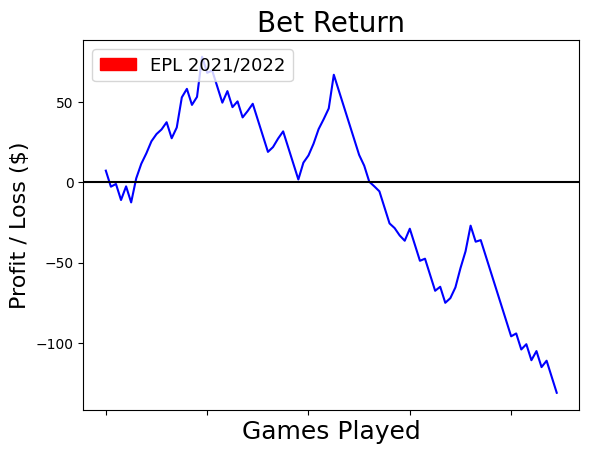

In [109]:
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import matplotlib.patches as mpatches

merged_res['payOut'].cumsum().plot(linestyle='-', color='blue');

red_patch = mpatches.Patch(color='red', label='EPL 2021/2022')

plt.legend(handles=[red_patch],loc=2,prop={'size': 13})

plt.xlabel('Games Played', fontsize=18)
plt.ylabel('Profit / Loss ($)', fontsize=16)

plt.title("Bet Return", fontsize=20)

axhline(0, color='black')

# remove x axis ticks
plt.tick_params( axis='x',labelbottom=False)

plt.show;

In [ ]:
#skoða núna ef salka er með lægri stuðul en bookie á sitt pikk(mestmegnis draw betting)

In [111]:
def model_higher_than_bookies (df):

    '''Returns a 1 if model predicted probability greater than bookies predicted probability for that result'''

    Model_Prediction = df['SalkaPrediction']

    if Model_Prediction == 1:
        if df['SalkaH'] <= df['OddsH']:
            return 1
        else:
            return 0
    if Model_Prediction == 2:
        if df['SalkaD'] <= df['OddsD']:
            return 1
        else:
            return 0
    if Model_Prediction == 3:
        if df['SalkaA'] <= df['OddsA']:
            return 1
        else:
            return 0

In [112]:
merged_res

,GW,HomeTeam,AwayTeam,HomeGoals,AwayGoals,winner,SalkaH,SalkaD,SalkaA,OddsH,OddsD,OddsA,SalkaCorrect,SalkaPrediction,payOut
0,4,Luton,West Ham,1.0,2.0,3,12.50,2.26,2.09,4.75,3.80,1.73,1,3,7.3
1,4,Sheffield United,Everton,2.0,2.0,2,3.61,3.05,2.53,2.90,3.25,2.50,0,3,-10.0
2,4,Manchester City,Fulham,5.0,1.0,1,1.50,4.49,8.93,1.17,8.00,15.00,1,1,1.7
3,4,Brentford,Bournemouth,2.0,2.0,2,1.86,2.94,8.24,1.73,3.80,4.75,0,1,-10.0
4,4,Burnley,Tottenham,2.0,5.0,3,11.54,2.58,1.90,3.60,4.00,1.85,1,3,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,12,Aston Villa,Fulham,3.0,1.0,1,1.61,4.55,6.25,1.57,4.20,5.50,1,1,5.7
86,12,Brighton,Sheffield United,1.0,1.0,2,1.59,4.55,6.64,1.25,5.75,13.00,0,1,-10.0
87,12,Liverpool,Brentford,3.0,0.0,1,2.13,2.94,5.24,1.40,5.00,6.50,1,1,4.0
88,12,West Ham,Nottingham Forest,3.0,2.0,1,3.11,2.28,4.17,1.85,3.60,4.00,0,2,-10.0


In [113]:
merged_res = merged_res.assign(SalkaConfident = merged_res.apply(model_higher_than_bookies, axis=1))
Strategy1 = merged_res[merged_res['SalkaConfident']==1]

In [114]:
Strategy1

,GW,HomeTeam,AwayTeam,HomeGoals,AwayGoals,winner,SalkaH,SalkaD,SalkaA,OddsH,OddsD,OddsA,SalkaCorrect,SalkaPrediction,payOut,SalkaConfident
13,5,Aston Villa,Crystal Palace,3.0,1.0,1,3.35,2.76,2.95,1.91,3.60,4.00,0,2,-10.0,1
15,5,Manchester United,Brighton,1.0,3.0,3,4.17,2.73,2.54,2.15,4.00,2.88,1,3,18.8,1
19,5,Nottingham Forest,Burnley,1.0,1.0,2,3.52,2.09,4.19,2.20,3.50,3.25,1,2,25.0,1
23,6,Brentford,Everton,1.0,3.0,3,2.48,2.35,5.81,1.75,3.80,4.33,0,2,-10.0,1
25,6,Chelsea,Aston Villa,0.0,1.0,3,3.12,2.88,3.00,1.90,3.75,3.80,0,2,-10.0,1
37,7,Tottenham,Liverpool,2.0,1.0,1,3.83,4.49,1.94,2.90,4.00,2.15,0,3,-10.0,1
38,7,Nottingham Forest,Brentford,1.0,1.0,2,3.15,3.57,2.48,2.75,3.10,2.70,0,3,-10.0,1
45,8,Crystal Palace,Nottingham Forest,0.0,0.0,2,2.91,2.58,3.73,2.20,3.10,3.60,1,2,21.0,1
46,8,Brighton,Liverpool,2.0,2.0,2,4.57,4.12,1.86,3.00,3.80,2.20,0,3,-10.0,1
48,8,Wolverhampton Wanderers,Aston Villa,1.0,1.0,2,8.43,2.91,1.86,3.50,3.40,2.10,0,3,-10.0,1


In [115]:
def pay_out_v2 (df):

    Result = df['winner']
    Model_score = df['SalkaCorrect']

    #Payout for a $10 bet
    payout = [0]
    home_win_payout = 10*(df['OddsH'] - 1)
    draw_payout = 10*(df['OddsD'] - 1)
    home_loss_payout = 10*(df['OddsA']-1)

    if Model_score == 1:
        if Result == 1:
            payout = home_win_payout
        elif Result == 2:
            payout = draw_payout
        elif Result == 3:
            payout = home_loss_payout
    else: payout = -10

    return payout

In [116]:
Strategy1 = Strategy1.assign(payOut = Strategy1.apply(pay_out, axis=1))

In [117]:
Resv2 = Strategy1['payOut'].cumsum()
Resv2

13   -10.0
15     8.8
19    33.8
23    23.8
25    13.8
37     3.8
38    -6.2
45    14.8
46     4.8
48    -5.2
49   -15.2
62   -25.2
65   -35.2
70   -23.2
72    -7.2
75   -17.2
76   -27.2
77   -37.2
79   -47.2
80   -57.2
82   -67.2
88   -77.2
Name: payOut, dtype: float64